# LSTM FORECASTING MODEL

In [1]:
#cd~

C:\Users\cash


In [1]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential 
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [2]:
df = pd.read_csv("timeseries_salesdata.csv")
print("Number of Row and Columns:",df.shape)
df.head()

Number of Row and Columns: (996, 2)


,Date,Sales
0,11-Apr-18,4388.23
1,12-Apr-18,5206.76
2,13-Apr-18,1784.65
3,14-Apr-18,2419.71
4,15-Apr-18,2462.46


In [3]:
training_set = df.iloc[:900,1:2].values
test_set = df.iloc[900:,1:2].values

In [4]:
print(len(training_set))
print(len(test_set))

900
96


In [5]:
#Feature Scaling
sc= MinMaxScaler(feature_range = (0,1))
training_set_scaled = sc.fit_transform(training_set)

#Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []

for i in range (30,900):
    X_train.append(training_set_scaled[i-30:i, 0])
    y_train.append(training_set_scaled[i,0])

X_train,y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
#(870,30,1)

In [6]:

dataset_train = df.iloc[:900,1:2]
dataset_test = df.iloc[900:,1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
y_test = []

for i in range (30,126):
    X_test.append(inputs[i-30:i, 0])
    y_test.append(inputs[i,0])

X_test,y_test = np.array(X_test),np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# shape (459,60,1)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)


(870, 30, 1)
(870,)
(96, 30, 1)
(96,)


In [8]:
model = Sequential()

#Adding the first LSTM Layer and Some Dropout regularisation

model.add(LSTM(units = 50, return_sequences =True, input_shape = (X_train.shape[1],1)))
model.add(Dropout(0.2))

#Adding a second layer LSTM Layer and some dropout regularisation
model.add(LSTM(units = 50, return_sequences =True))
model.add(Dropout(0.2))

#Adding a Third LSTM Layer and some Dropout
model.add(LSTM(units = 50, return_sequences =True))
model.add(Dropout(0.2))

#Adding a fouth LSTM Layer and ...
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

#Adding the output layer
model.add(Dense(units=1))

#compling the RNN
model.compile(optimizer = "adam", loss = "mean_squared_error")



In [9]:
#Fitting the RNN to the Training set

history = model.fit(X_train, y_train, epochs = 100, batch_size = 32, verbose=1,validation_data=(X_test,y_test), callbacks=[EarlyStopping(monitor='val_loss', patience=10)],shuffle=False)

Epoch 1/100
28/28 [==============================] - 106s 459ms/step - loss: 0.0091 - val_loss: 0.0444
Epoch 2/100
28/28 [==============================] - 3s 123ms/step - loss: 0.0087 - val_loss: 0.0431
Epoch 3/100
28/28 [==============================] - 3s 118ms/step - loss: 0.0085 - val_loss: 0.0441
Epoch 4/100
28/28 [==============================] - 4s 127ms/step - loss: 0.0077 - val_loss: 0.0414
Epoch 5/100
28/28 [==============================] - 4s 140ms/step - loss: 0.0077 - val_loss: 0.0406
Epoch 6/100
28/28 [==============================] - 4s 137ms/step - loss: 0.0072 - val_loss: 0.0398
Epoch 7/100
28/28 [==============================] - 3s 121ms/step - loss: 0.0071 - val_loss: 0.0394
Epoch 8/100
28/28 [==============================] - 3s 117ms/step - loss: 0.0068 - val_loss: 0.0393
Epoch 9/100
28/28 [==============================] - 4s 139ms/step - loss: 0.0067 - val_loss: 0.0389
Epoch 10/100
28/28 [==============================] - 4s 152ms/step - loss: 0.0068 - val_

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 30, 50)            10400     
_________________________________________________________________
dropout (Dropout)            (None, 30, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 30, 50)            20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 30, 50)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 50)                2

In [11]:
#Getting the predicted stock price of 2017

dataset_train = df.iloc[:900,1:2]
dataset_test = df.iloc[900:,1:2]

dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-30:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range (30,126):
    X_test.append(inputs[i-30:i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
# shape (459,60,1)

In [12]:
X_test.shape

(96, 30, 1)

In [13]:
#pred.shape

In [14]:
#Making Predictions 
pred = model.predict(X_test)
pred = sc.inverse_transform(pred)
pred.shape

(96, 1)

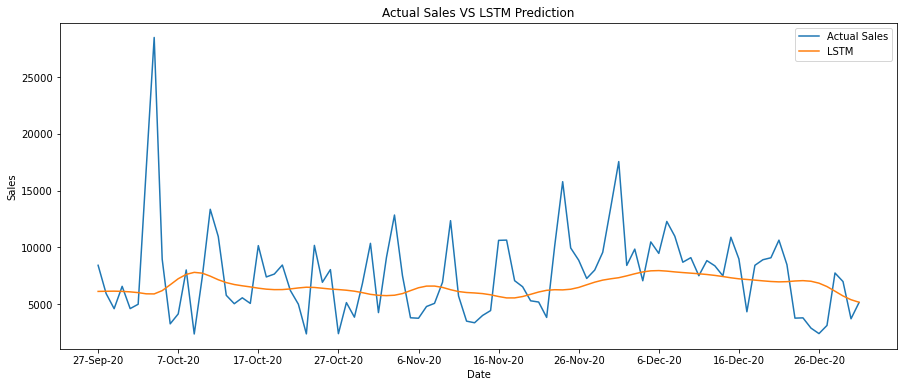

In [15]:
plt.rcParams['figure.figsize']= [15,6]
plt.plot(df.loc[900:,"Date"], dataset_test.values, label = "Actual Sales")
plt.plot(df.loc[900:,"Date"],pred, label = "LSTM")
plt.xticks(np.arange(0,96,10))
plt.title("Actual Sales VS LSTM Prediction")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.show()

In [16]:
from sklearn import metrics
def timeseries_evaluation_metrics_func(y_true, y_pred):
    
    def mean_absolute_percentage_error(y_true, y_pred): 
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    print('Evaluation metric results:-')
    print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
    print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
    print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
    print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
    print(f'R2 is : {metrics.r2_score(y_true, y_pred)}',end='\n\n')

In [17]:
print(timeseries_evaluation_metrics_func(test_set,pred))

Evaluation metric results:-
MSE is : 15714210.920013169
MAE is : 2696.668033854167
RMSE is : 3964.1154019545356
MAPE is : 40.2790542874214
R2 is : -0.055197409336419145

None


In [18]:
#LSTMmodel = model.fit(X_train, y_train, epochs = 100, batch_size = 32)

In [19]:
def model_loss(history):
    plt.figure(figsize=(8,4))
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Test Loss')
    plt.title('LSTM model loss')
    plt.ylabel('loss')
    plt.xlabel('epochs')
    plt.legend(loc='upper right')
    plt.show();

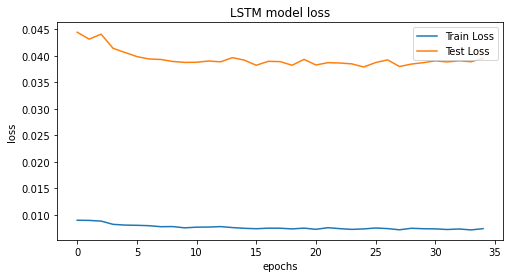

In [20]:
train_score = model.evaluate(X_train, y_train, verbose=0)
#print('Train Root Mean Squared Error(RMSE): %.2f; Train Mean Absolute Error(MAE) : %.2f ' 
#% (np.sqrt(train_score[1]), train_score[2]))
#test_score = model.evaluate(X_test, test_set, verbose=0)
#print('Test Root Mean Squared Error(RMSE): %.2f; Test Mean Absolute Error(MAE) : %.2f ' 
#% (np.sqrt(test_score[1]), test_score[2]))
model_loss(history)